In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

from torchsummary import summary

import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as data

from resnet_32 import BasicBlock, ResNet
from train_eval_util import train, evaluate, calculate_accuracy, epoch_time, total_layers, total_params
from getCIFAR10 import train_data, valid_data, test_data

import time

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [4]:
if torch.cuda.is_available():
    device = torch.device('cuda')
elif torch.backends.mps.is_available():
    device = torch.device('mps')  
else:
    device = torch.device('cpu')

print(f"Selected device: {device}")

Selected device: cuda


In [5]:
BATCH_SIZE = 128

train_iterator = DataLoader(train_data, batch_size= BATCH_SIZE, shuffle=True)
valid_iterator =  DataLoader(valid_data, batch_size=BATCH_SIZE, shuffle=False)
test_iterator =  DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)

In [8]:
model = ResNet(BasicBlock, [2, 2, 2, 2]).to(device)

print(f"Total number of layers: {total_layers(model)}")
print(f"Total number of parameters: {total_params(model)}")

summary(model)


Total number of layers: 18
Total number of parameters: 2797610
Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            864
├─BatchNorm2d: 1-2                       64
├─Sequential: 1-3                        --
|    └─BasicBlock: 2-1                   --
|    |    └─Conv2d: 3-1                  9,216
|    |    └─BatchNorm2d: 3-2             64
|    |    └─Conv2d: 3-3                  9,216
|    |    └─BatchNorm2d: 3-4             64
|    |    └─Sequential: 3-5              --
|    └─BasicBlock: 2-2                   --
|    |    └─Conv2d: 3-6                  9,216
|    |    └─BatchNorm2d: 3-7             64
|    |    └─Conv2d: 3-8                  9,216
|    |    └─BatchNorm2d: 3-9             64
|    |    └─Sequential: 3-10             --
├─Sequential: 1-4                        --
|    └─BasicBlock: 2-3                   --
|    |    └─Conv2d: 3-11                 18,432
|    |    └─BatchNorm2d: 3-12            128
|    |    └─Conv2d: 3-13          

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            864
├─BatchNorm2d: 1-2                       64
├─Sequential: 1-3                        --
|    └─BasicBlock: 2-1                   --
|    |    └─Conv2d: 3-1                  9,216
|    |    └─BatchNorm2d: 3-2             64
|    |    └─Conv2d: 3-3                  9,216
|    |    └─BatchNorm2d: 3-4             64
|    |    └─Sequential: 3-5              --
|    └─BasicBlock: 2-2                   --
|    |    └─Conv2d: 3-6                  9,216
|    |    └─BatchNorm2d: 3-7             64
|    |    └─Conv2d: 3-8                  9,216
|    |    └─BatchNorm2d: 3-9             64
|    |    └─Sequential: 3-10             --
├─Sequential: 1-4                        --
|    └─BasicBlock: 2-3                   --
|    |    └─Conv2d: 3-11                 18,432
|    |    └─BatchNorm2d: 3-12            128
|    |    └─Conv2d: 3-13                 36,864
|    |    └─BatchNorm2d: 3-14            128
|   

In [9]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)


In [10]:
num_epochs = 150
train_acc_history = []
train_loss_history = []
valid_acc_history = []
valid_loss_history = []

for epoch in range(num_epochs):

    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, device)
        
    end_time = time.time()

        
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

    train_acc_history.append(train_acc)
    train_loss_history.append( train_loss)
    valid_acc_history.append(valid_acc)
    valid_loss_history.append(valid_loss)

Epoch: 01 | Epoch Time: 0m 19s
	Train Loss: 1.350 | Train Acc: 50.80%
	 Val. Loss: 1.410 |  Val. Acc: 51.23%
Epoch: 02 | Epoch Time: 0m 17s
	Train Loss: 0.928 | Train Acc: 66.87%
	 Val. Loss: 0.836 |  Val. Acc: 70.16%
Epoch: 03 | Epoch Time: 0m 17s
	Train Loss: 0.747 | Train Acc: 73.67%
	 Val. Loss: 0.787 |  Val. Acc: 72.71%
Epoch: 04 | Epoch Time: 0m 17s
	Train Loss: 0.638 | Train Acc: 77.58%
	 Val. Loss: 0.646 |  Val. Acc: 78.18%
Epoch: 05 | Epoch Time: 0m 17s
	Train Loss: 0.571 | Train Acc: 80.11%
	 Val. Loss: 0.608 |  Val. Acc: 78.59%
Epoch: 06 | Epoch Time: 0m 17s
	Train Loss: 0.515 | Train Acc: 82.06%
	 Val. Loss: 0.515 |  Val. Acc: 82.30%
Epoch: 07 | Epoch Time: 0m 17s
	Train Loss: 0.472 | Train Acc: 83.62%
	 Val. Loss: 0.495 |  Val. Acc: 82.95%
Epoch: 08 | Epoch Time: 0m 17s
	Train Loss: 0.437 | Train Acc: 84.70%
	 Val. Loss: 0.587 |  Val. Acc: 79.55%
Epoch: 09 | Epoch Time: 0m 17s
	Train Loss: 0.409 | Train Acc: 85.60%
	 Val. Loss: 0.483 |  Val. Acc: 83.40%
Epoch: 10 | Epoch T

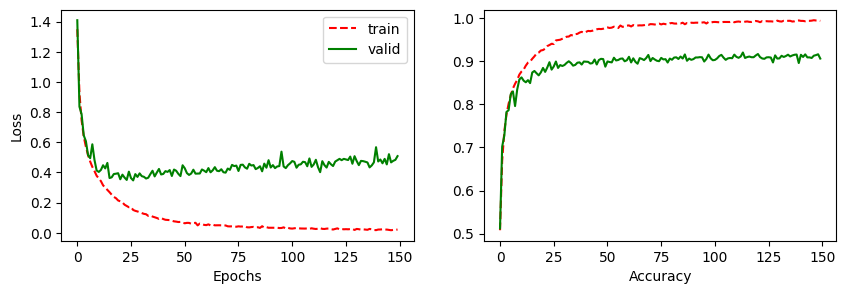

In [11]:
import matplotlib.pyplot as plt

fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

ax1.plot(range(num_epochs), train_loss_history, '--r')
ax1.plot(range(num_epochs), valid_loss_history, '-g')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(['train', 'valid'])

ax2.plot(range(num_epochs), train_acc_history, '--r')
ax2.plot(range(num_epochs), valid_acc_history, '-g')
ax2.set_xlabel('Epochs')
ax2.set_xlabel('Accuracy')
ax1.legend(['train', 'valid'])

In [12]:
torch.save(model, 'resnet18.pt')